In [2]:
# check current directory
import os
os.getcwd()

# change directory to where the data is
os.chdir('/home/uccacbo/CrystaLLM-Prop')
os.getcwd()

'/home/uccacbo/CrystaLLM-Prop'

### Inference test for Cifextd

In [5]:
!python bin/cifextd_inference.py --config sampling/prompt_config/inference_LoRA.yaml

Using configuration:
{'out_dir': 'model_ckpts/finetuned_models_excl_0BG/BG_LoRA', 'device': 'cuda', 'dtype': 'bfloat16', 'compile': False, 'pkl_file': 'CIF_BG_proj/0BG_datasets/BG_large_test_excl_0BG.pkl.gz', 'plot_dir': 'inference_plots/BG_LoRA_excl_0BG/'}
number of parameters: 201.74M
Model loaded successfully.
Evaluating test set predicted vs true BG values:  15%|▏| 419/2874 [00:44<04:14, ^C
Evaluating test set predicted vs true BG values:  15%|▏| 419/2874 [00:44<04:23, 
Traceback (most recent call last):
  File "/home/uccacbo/CrystaLLM-Prop/bin/cifextd_inference.py", line 196, in <module>
    main()
  File "/home/uccacbo/CrystaLLM-Prop/bin/cifextd_inference.py", line 127, in main
    y = model.generate(x, max_new_tokens=4, temperature=0.7, top_k=10)
  File "/home/uccacbo/miniconda3/envs/crystallm_venv/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/home/uccacbo/CrystaLLM/crystallm/_model.py", line 416

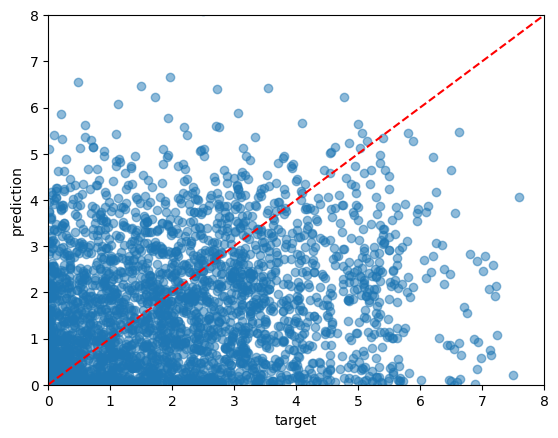

In [21]:
# load df from pickle file
import pandas as pd

df = pd.read_pickle('inference_plots/BG_all_excl_0BG/MAE: 1.5431, RMSE: 2.0283, MSE: 4.1141.pkl')

# plot the results, on a log scale
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.scatter(df['true_bandgaps'], df['predicted_bandgaps'], alpha=0.5)
ax.plot([0, 8], [0, 8], 'r--')
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xlabel('target')
ax.set_ylabel('prediction')
plt.show()


In [14]:
!python bin/regr_inference.py

Loaded test dataset with 13 samples.
Model configuration: {'n_layer': 16, 'n_head': 16, 'n_embd': 1024, 'block_size': 2048, 'bias': False, 'vocab_size': 371, 'dropout': 0.1, 'finetune_method': 'LoRA', 'sanity_check': False, 'unk_token_id': 370, 'max_token_length': 4792, 'latent_dim': 1024}
Test DataLoader created with batch size 1.
UNK token ID: 370, using it for AttentionPooling
Using latent dimension of 1024 for regression head
number of parameters: 202.79M
dict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.attn.c_attn.linear.linear.weight', 'transformer.h.0.attn.c_attn.linear.lora.A', 'transformer.h.0.attn.c_attn.linear.lora.B', 'transformer.h.0.attn.c_attn.lora.A', 'transformer.h.0.attn.c_attn.lora.B', 'transformer.h.0.attn.c_proj.linear.linear.weight', 'transformer.h.0.attn.c_proj.linear.lora.A', 'transformer.h.0.attn.c_proj.linear.lora.B', 'transformer.h.0.attn.c_proj.lora.A', 'transformer.h.0.attn.c_proj.lora.B', 'trans

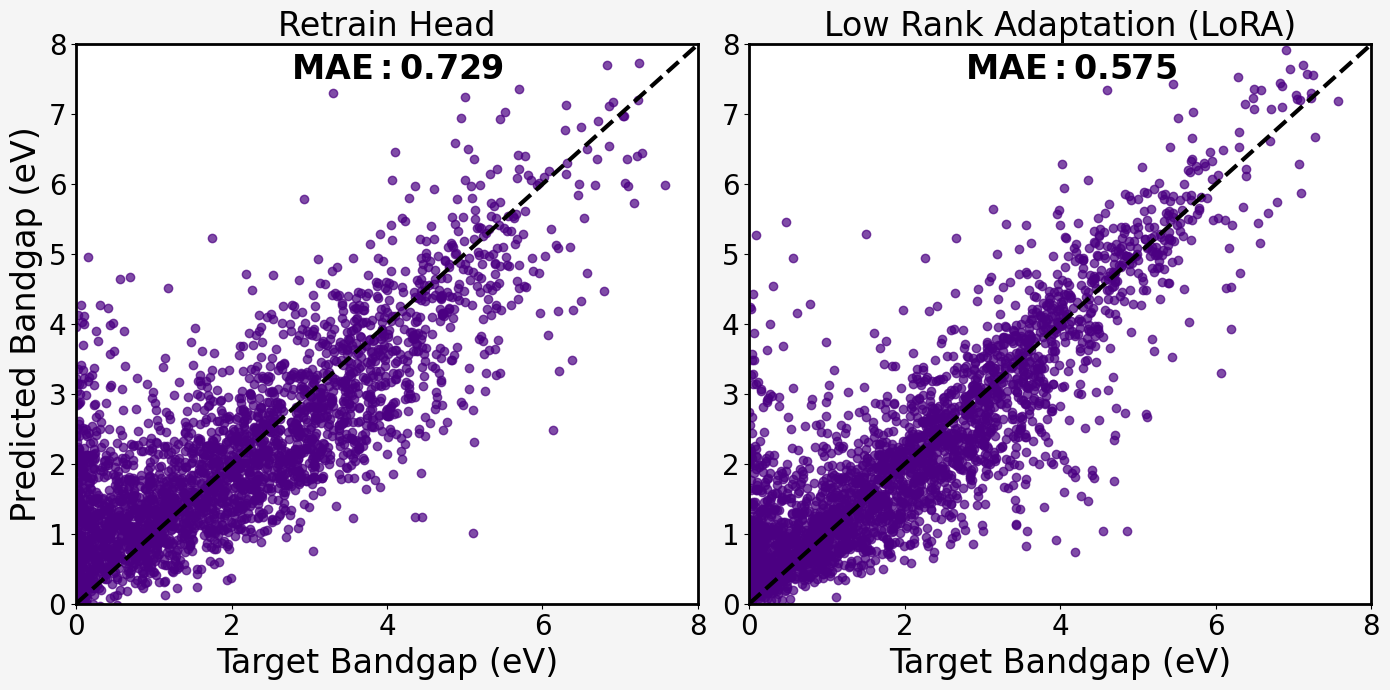

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df2 = pd.read_pickle('inference_plots/BG_regr_LoRA/MAE_0.5749_MSE_0.6908.pkl')
df = pd.read_pickle('inference_plots/BG_regre_head/MAE_0.7286_MSE_0.9740.pkl')

true_BG = df['true_bandgaps']
pred_BG = df['predicted_bandgaps']
df_2_true_BG = df2['true_bandgaps']
df_2_pred_BG = df2['predicted_bandgaps']

# turn into a numpy array
true_BG = np.array(true_BG)
pred_BG = np.array(pred_BG)
df_2_true_BG = np.array(df_2_true_BG)
df_2_pred_BG = np.array(df_2_pred_BG)

# Calculate MAE for each dataset
mae1 = np.mean(np.abs(true_BG - pred_BG))
mae2 = np.mean(np.abs(df_2_true_BG - df_2_pred_BG))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='whitesmoke')

# Common settings for subplots
for ax in axes:
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.plot([0, 8], [0, 8], 'k--', linewidth=3)  # Ideal y=x line
    ax.set_xlabel('Target Bandgap (eV)', fontsize=24, color='black')
    ax.set_ylabel('Predicted Bandgap (eV)', fontsize=24, color='black')
    ax.tick_params(axis='both', colors='black', labelsize=20)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)

# Plot data and annotate MAE
# mak ticks black and x shape
axes[0].scatter(df['true_bandgaps'], df['predicted_bandgaps'], color='indigo', alpha=0.7)
axes[0].text(5.5, 7.5, f'$\mathbf{{MAE: {mae1:.3f}}}$', color='black', fontsize=24, ha='right')
axes[0].set_title('Retrain Head', fontsize=24, color='black')

axes[1].scatter(df2['true_bandgaps'], df2['predicted_bandgaps'], color='indigo', alpha=0.7)
axes[1].text(5.5, 7.5, f'$\mathbf{{MAE: {mae2:.3f}}}$', color='black', fontsize=24, ha='right')
axes[1].set_title('Low Rank Adaptation (LoRA)', fontsize=24, color='black')
# remove label of y axis
axes[1].set_ylabel('')
# list possible colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

# Save figure
plt.tight_layout()
plt.savefig('bandgap_predictions_ftHvsLoRA.svg', format='svg', facecolor=fig.get_facecolor())
plt.show()



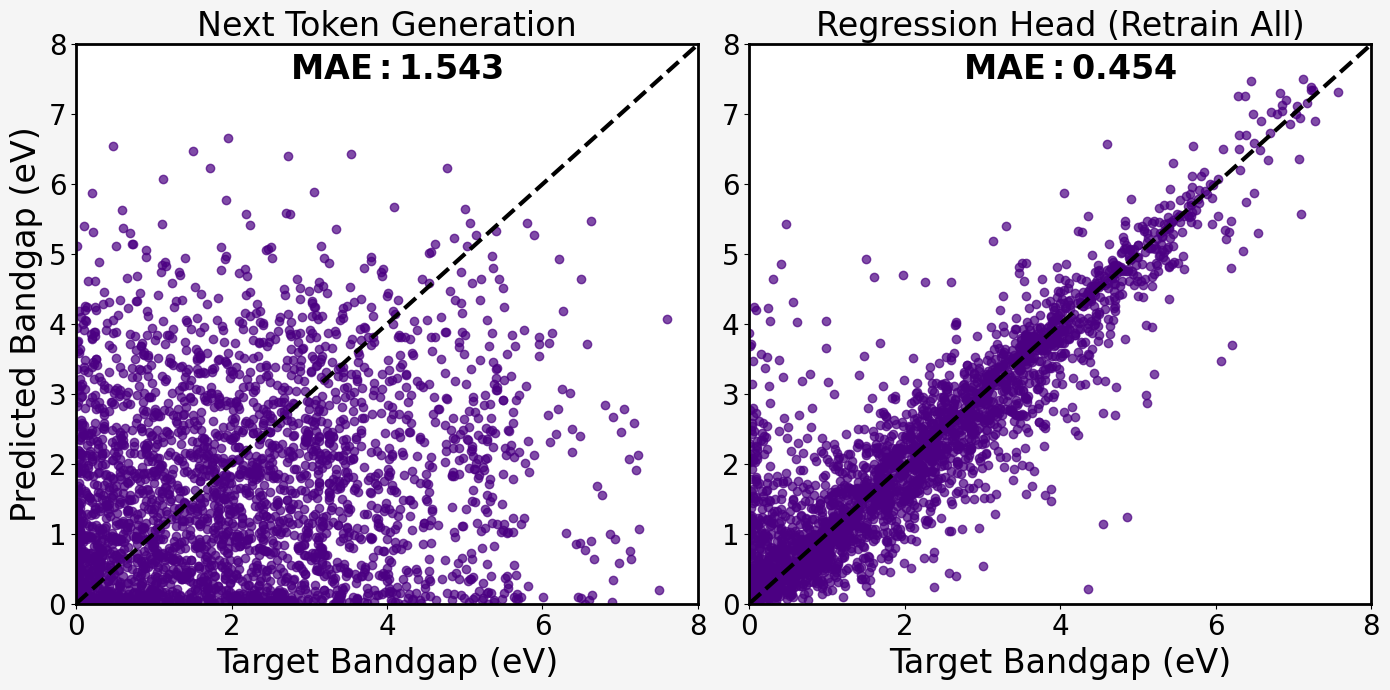

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df = pd.read_pickle('inference_plots/BG_all_excl_0BG/MAE: 1.5431, RMSE: 2.0283, MSE: 4.1141.pkl')
df2 = pd.read_pickle('inference_plots/BG_regr_all/MAE_0.4545_MSE_0.5190.pkl')

true_BG = df['true_bandgaps']
pred_BG = df['predicted_bandgaps']
df_2_true_BG = df2['true_bandgaps']
df_2_pred_BG = df2['predicted_bandgaps']

# turn into a numpy array
true_BG = np.array(true_BG)
pred_BG = np.array(pred_BG)
df_2_true_BG = np.array(df_2_true_BG)
df_2_pred_BG = np.array(df_2_pred_BG)

# Calculate MAE for each dataset
mae1 = np.mean(np.abs(true_BG - pred_BG))
mae2 = np.mean(np.abs(df_2_true_BG - df_2_pred_BG))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='whitesmoke')

# Common settings for subplots
for ax in axes:
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.plot([0, 8], [0, 8], 'k--', linewidth=3)  # Ideal y=x line
    ax.set_xlabel('Target Bandgap (eV)', fontsize=24, color='black')
    ax.set_ylabel('Predicted Bandgap (eV)', fontsize=24, color='black')
    ax.tick_params(axis='both', colors='black', labelsize=20)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)

# Plot data and annotate MAE
# mak ticks black and x shape
axes[0].scatter(df['true_bandgaps'], df['predicted_bandgaps'], color='indigo', alpha=0.7)
axes[0].text(5.5, 7.5, f'$\mathbf{{MAE: {mae1:.3f}}}$', color='black', fontsize=24, ha='right')
axes[0].set_title('Next Token Generation', fontsize=24, color='black')

axes[1].scatter(df2['true_bandgaps'], df2['predicted_bandgaps'], color='indigo', alpha=0.7)
axes[1].text(5.5, 7.5, f'$\mathbf{{MAE: {mae2:.3f}}}$', color='black', fontsize=24, ha='right')
axes[1].set_title('Regression Head (Retrain All)', fontsize=24, color='black')
# remove label of y axis
axes[1].set_ylabel('')
# list possible colors
# https://matplotlib.org/stable/gallery/color/named_colors.html

# Save figure
plt.tight_layout()
plt.savefig('bandgap_predictions_NTGvsRH(ftA).svg', format='svg', facecolor=fig.get_facecolor())
plt.show()

In [43]:
# go thorugh all folders in comp metrics, then in each folder is an emissions.csv file
# read all emissions.csv files and get the energy_consumed column
# concatenate all energy_consumed columns into a single dataframe
# print the total energy consumed over all runs and files

import os
import pandas as pd
from tqdm import tqdm

# look in /home/uccacbo/CrystaLLM/comp_metrics
os.chdir('/home/uccacbo/CrystaLLM/comp_metrics')
# list all the files in the comp_metrics folder
files = os.listdir()
# create an empty list to store the dataframes
dfs = []
# loop through all the files with tdqm
for file in tqdm(files):
    # check if the file is a directory
    if os.path.isdir(file):
        # change directory to the directory
        os.chdir(file)
        # read the emissions.csv file
        df = pd.read_csv('emissions.csv')
        # append the dataframe to the list
        dfs.append(df)
        # change directory back to the comp_metrics folder
        os.chdir('..')

# concatenate all the dataframes in the list
df = pd.concat(dfs)
# calculate the total energy consumed
total_energy_consumed = df['energy_consumed'].sum()
total_training_time = df['duration'].sum()
# convert training time to hours
total_training_time = total_training_time / 3600

# print the total energy consumed
print(f'Total energy consumed: {total_energy_consumed}')
print(f'Total training time: {total_training_time}')

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 410.26it/s]

Total energy consumed: 86.53931674967825
Total training time: 241.3600719007015


In [50]:
# a washing machine uses 2.1 kWh
# calculate how many washing machines could be run for the total energy consumed

washing_machine_energy = 2.1
washing_machines = total_energy_consumed / washing_machine_energy
# print the number of washing machines to 2 decimal places
print(f'Total energy consumed build, hyperparam search, and train on best params: : {total_energy_consumed:.2f} kWh')
print(f'Total training time for build, hyperparam search, and train on best params: {total_training_time:.2f} h')
print(f'Number of 1 hour washing machine cycles in UK: {washing_machines:.2f}')

Total energy consumed build, hyperparam search, and train on best params: : 86.54 kWh
Total training time for build, hyperparam search, and train on best params: 241.36 h
Number of 1 hour washing machine cycles in UK: 41.21
